# Final Project Submission

Please fill out:
* Student name: Andy Martin del Campo
* Student pace: full time
* Scheduled project review date/time: 9/11/19 @ 11 AM
* Instructor name: Victor
* Blog post URL:


# 3 Questions 

1. What feature has the greatest impact on the price?

2. 

# Getting the data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#puts the CSV file into a pandas dataframe for viewing and manipulation
df = pd.read_csv('kc_house_data.csv')

In [2]:
#brief look at data
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
#get info on columns
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


## First Assumptions
- It looks like the data all has the same number of entries. 

- I can get rid of the id as long as there are not duplicates

- For this project i also won't be using the date

- Need to get everything in the right datatype

# Cleaning the Data

## Check for duplicates

In [4]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

[0 rows x 21 columns]


- For the 'id' column there are several houses which have been relisted at several points. It is okay that they have the same value since the rest of the listing information is different


## Changing the column type to be something that makes sense

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [6]:
#Change sqft_basement from a string to a float
#The issue is there are a lot of '?' used. First I will change these to 0 
#values and then the data type to float
df.sqft_basement = df.sqft_basement.replace('?', 0)

df.sqft_basement = df.sqft_basement.astype('float64')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.5+ MB


In [8]:
#drop the date and id columns
df = df.drop(columns = ['id','date'])

## Using IterativeImputer to impute missing values


While I could have gone through and changed any NaN values to 0 or something else on my own I thought for this project it would be more benificial to my learning to use a function that others recommend is better than just filling the median/mean. While I know this may bias my data and in the end the model may be a little off I wanted to try it. 

IterativeImputer is a multivariate imputer that estimates each feature from all the others. It models each feature with missing values as a functIon of other features in a round-robin fashion. 

In [9]:
imp = IterativeImputer(max_iter=10, verbose=0)
imp.fit(df)
imputed_df = imp.transform(df)
imputed_df = pd.DataFrame(imputed_df, columns=df.columns)
imputed_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,-0.00443,0.0,3.0,7.0,1180.0,0.0,1955.0,0.000000,98178.0,47.5112,-122.257,1340.0,5650.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.00000,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.000000,98125.0,47.7210,-122.319,1690.0,7639.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0.00000,0.0,3.0,6.0,770.0,0.0,1933.0,131.686768,98028.0,47.7379,-122.233,2720.0,8062.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.00000,0.0,5.0,7.0,1050.0,910.0,1965.0,0.000000,98136.0,47.5208,-122.393,1360.0,5000.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.00000,0.0,3.0,8.0,1680.0,0.0,1987.0,0.000000,98074.0,47.6168,-122.045,1800.0,7503.0


In [10]:
imputed_df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [11]:
imputed_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007640,0.234330,3.409825,7.657915,1788.596842,285.716581,1970.999676,83.784332,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.082933,0.765843,0.650546,1.173200,827.759761,439.819830,29.375234,367.769172,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,-0.083039,-0.190361,1.000000,3.000000,370.000000,0.000000,1900.000000,-267.361064,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,6.109648,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [12]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,285.716581,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,439.819830,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [13]:
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
price            21597 non-null float64
bedrooms         21597 non-null float64
bathrooms        21597 non-null float64
sqft_living      21597 non-null float64
sqft_lot         21597 non-null float64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null float64
grade            21597 non-null float64
sqft_above       21597 non-null float64
sqft_basement    21597 non-null float64
yr_built         21597 non-null float64
yr_renovated     21597 non-null float64
zipcode          21597 non-null float64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null float64
sqft_lot15       21597 non-null float64
dtypes: float64(19)
memory usage: 3.1 MB


This seems to have worked well for every feature except for the occasional negative number given. I will manually correct this by setting those values equal to 0.

### Set all values of waterfront that are not 1 to 0

In [14]:
imputed_df.loc[imputed_df.waterfront < 1, 'waterfront'] = 0

In [15]:
imputed_df.waterfront.describe()

count    21597.000000
mean         0.006760
std          0.081944
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

### Edit yr_renovated so that any values below 1900 are 0 and all other values are 1 for renovated

In [16]:
imputed_df.yr_renovated = imputed_df.yr_renovated.astype('int64')

In [17]:
imputed_df.loc[imputed_df.yr_renovated < 1975, 'yr_renovated'] = 0
imputed_df.loc[imputed_df.yr_renovated != 0, 'yr_renovated'] = 1

In [18]:
imputed_df.yr_renovated.describe()

count    21597.000000
mean         0.030977
std          0.173258
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: yr_renovated, dtype: float64

### Set any value of view less than 0 to 0 or greater than 4 to 4

In [19]:
#round views
imputed_df.view = imputed_df.view.round()

In [20]:
#limit view to a max value of 4
imputed_df.loc[imputed_df.view > 4, 'view'] = 4

In [21]:
imputed_df.view.describe()

count    21597.000000
mean         0.234060
std          0.765403
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

In [22]:
imputed_df.view.value_counts()

0.0    19470
2.0      958
3.0      508
1.0      343
4.0      318
Name: view, dtype: int64

### Check sqft_basement

In [23]:
imputed_df.sqft_basement.describe()

count    21597.000000
mean       285.716581
std        439.819830
min          0.000000
25%          0.000000
50%          0.000000
75%        550.000000
max       4820.000000
Name: sqft_basement, dtype: float64

In [24]:
#set any negative values to 0 for no basement
imputed_df.loc[imputed_df.sqft_basement < 0, 'sqft_basement'] = 0

## Limit price to 2 Million


In [25]:
imputed_df.drop(imputed_df[imputed_df.price > 1000000].index, inplace = True)

## Look at data

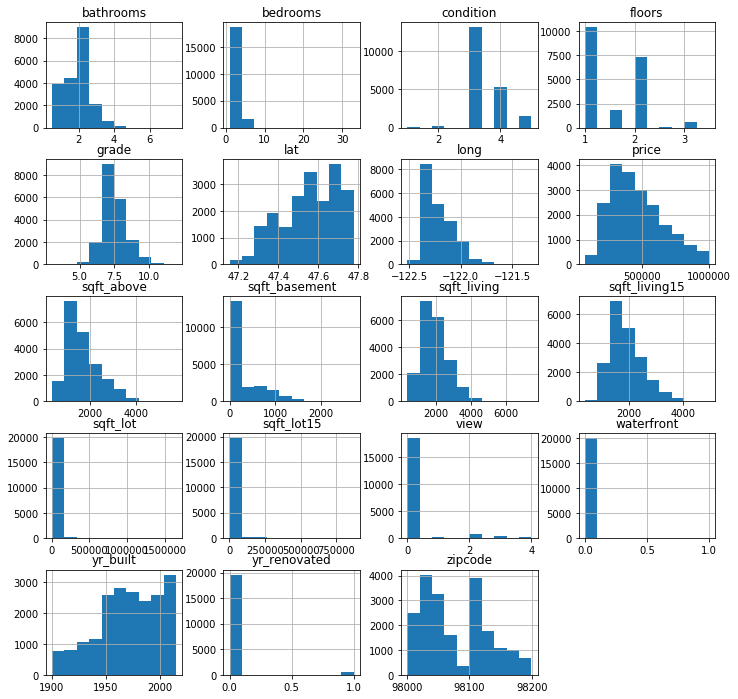

In [26]:
imputed_df.hist(figsize=(12,12));

### Look at the distribution for price

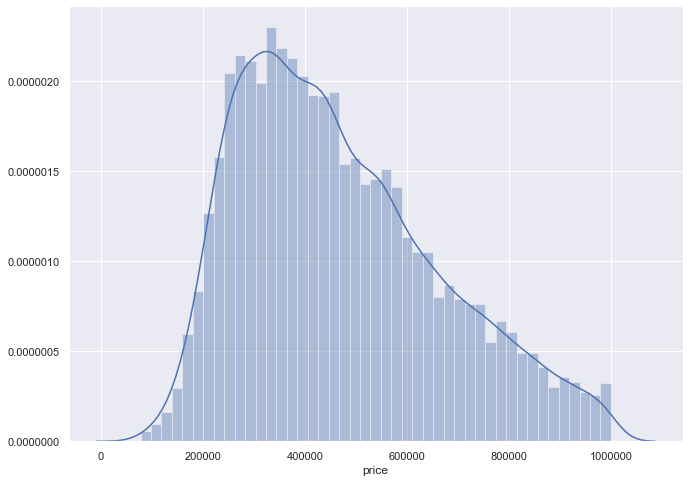

In [27]:
sns.set(rc={'figure.figsize':(11, 8)})
sns.distplot(imputed_df['price'])
plt.show()

Capping price at $1 million gets rid of a few outliers and really makes the data much more normal. 

### Limit Sqft_Lot to and Sqft_Lot15 to 50000

In [28]:
test_df = imputed_df.copy()

In [29]:
imputed_df.drop(imputed_df[imputed_df.sqft_lot > 50000].index, inplace = True)
imputed_df.drop(imputed_df[imputed_df.sqft_lot15 > 50000].index, inplace = True)

In [30]:
imputed_df.drop(imputed_df[imputed_df.bedrooms > 20].index, inplace = True)

In [31]:
imputed_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0,98178.0,47.5112,-122.257,1340.0,5650.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1,98125.0,47.7210,-122.319,1690.0,7639.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0,98028.0,47.7379,-122.233,2720.0,8062.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0,98136.0,47.5208,-122.393,1360.0,5000.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0,98074.0,47.6168,-122.045,1800.0,7503.0


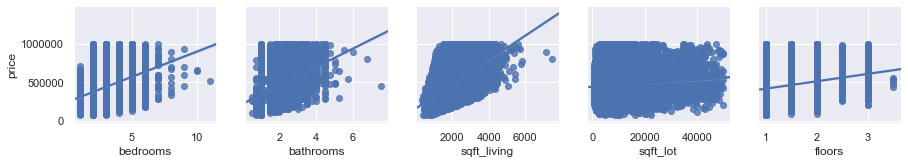

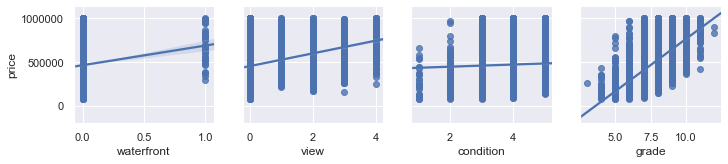

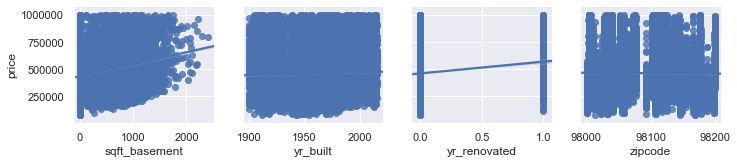

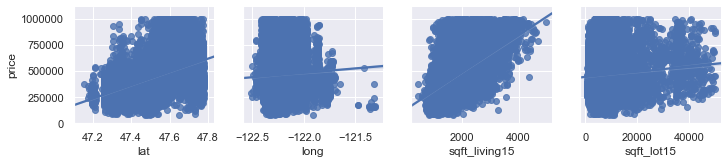

In [32]:
sns.pairplot(imputed_df, x_vars=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors'], y_vars='price', kind='reg');
sns.pairplot(imputed_df, x_vars=['waterfront', 'view', 'condition', 'grade'], y_vars='price', kind='reg');
sns.pairplot(imputed_df, x_vars=['sqft_basement', 'yr_built', 'yr_renovated', 'zipcode'], y_vars='price', kind='reg');
sns.pairplot(imputed_df, x_vars=['lat', 'long', 'sqft_living15', 'sqft_lot15'], y_vars='price', kind='reg');

- There seem to be a few categorical variables
    -floors
    -waterfront
    -view
    -condition
    -grade
    -yr_renovated
    
- Zip Codes have an almost horizontal regression line in them. They would probably need to be binned based on their location and grouped together. However this would only make sense if I had a lot of information from each zipcode so I will just drop that category

## A Model Using Raw Features

In [33]:
from statsmodels.formula.api import ols

outcome = 'price'
predictors = []
for col in imputed_df:
    if col != 'price':
        predictors.append(col)
predictors = '+'.join(predictors)

formula = outcome + '~' + predictors
model = ols(formula=formula, data=imputed_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     2461.
Date:                Mon, 09 Sep 2019   Prob (F-statistic):               0.00
Time:                        17:23:48   Log-Likelihood:            -2.5020e+05
No. Observations:               19238   AIC:                         5.004e+05
Df Residuals:                   19219   BIC:                         5.006e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.025e+06   1.66e+06     -1.219      0.223   -5.28e+06    1.23e+06
bedrooms      -9091.5357   1163.251     -7.816      0.000   -1.14e+04   -6811.463
bathrooms      2.012e+04   1927.379     10.441      0.000    1.63e+04    2.39e+04
sqft_living      61.7941     11.098      5.568      0.000      40.042      83.547
sqft_lot         -0.5202      0.230     -2.263      0.024      -0.971      -0.070
floors         2.732e+04   2146.446     12.729      0.000    2.31e+04    3.15e+04
waterfront     1.802e+05   1.83e+04      9.869      0.000    1.44e+05    2.16e+05
view           2.767e+04   1419.008     19.502      0.000    2.49e+04    3.05e+04
condition       2.63e+04   1338.474     19.650      0.000    2.37e+04    2.89e+04
grade          7.108e+04   1292.787     54.984      0.000    6.85e+04    7.36e+04
sqft_above       10.5362     11.071      0.952      0.341     -11.164      32.237
sqft_basement     7.9868     10.975      0.728      0.467     -13.524      29.498
yr_built      -1828.4214     41.707    -43.840      0.000   -1910.170   -1746.673
yr_renovated   3.903e+04   5100.860      7.652      0.000     2.9e+04     4.9e+04
zipcode        -225.6302     18.619    -12.118      0.000    -262.125    -189.135
lat            5.455e+05   6029.168     90.469      0.000    5.34e+05    5.57e+05
long           -1.13e+04   7689.368     -1.470      0.142   -2.64e+04    3768.903
sqft_living15    53.6091      2.228     24.063      0.000      49.242      57.976
sqft_lot15       -1.8045      0.256     -7.039      0.000      -2.307      -1.302
==============================================================================
Omnibus:                     1100.471   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1755.790
Skew:                           0.476   Prob(JB):                         0.00
Kurtosis:                       4.132   Cond. No.                     2.12e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
imputed_df.price.describe()

count      19238.000000
mean      464102.919066
std       195658.304950
min        78000.000000
25%       310000.000000
50%       429975.000000
75%       588000.000000
max      1000000.000000
Name: price, dtype: float64

## Test for Colinearity

In [35]:
abs(imputed_df.corr())  > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


Sqft_living has a high colinearity with sqft_above. Since they both seem to have the same information I will just drop sqft_above.
Sqft_lot has a high colinearity with sqft_lot15. 

In [36]:
imputed_df = imputed_df.drop(columns = ['sqft_above', 'sqft_lot15'])

## Deal with Categorical Variables

### For categorical variables, if they are floats they will produce an odd column name

- View, waterfront, and condition are all integer values so I will change their datatype to int

- For floors, I will just drop and run the data

In [37]:
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19238 entries, 0 to 21596
Data columns (total 17 columns):
price            19238 non-null float64
bedrooms         19238 non-null float64
bathrooms        19238 non-null float64
sqft_living      19238 non-null float64
sqft_lot         19238 non-null float64
floors           19238 non-null float64
waterfront       19238 non-null float64
view             19238 non-null float64
condition        19238 non-null float64
grade            19238 non-null float64
sqft_basement    19238 non-null float64
yr_built         19238 non-null float64
yr_renovated     19238 non-null int64
zipcode          19238 non-null float64
lat              19238 non-null float64
long             19238 non-null float64
sqft_living15    19238 non-null float64
dtypes: float64(16), int64(1)
memory usage: 2.6 MB


In [38]:
#change waterfront to int64
imputed_df.waterfront = imputed_df.waterfront.astype('int64')

In [39]:
#change condition to int64
imputed_df.condition = imputed_df.condition.astype('int64')

In [40]:
#change view to int 64
imputed_df.view = imputed_df.view.astype('int64')

In [41]:
imputed_df.bedrooms = imputed_df.bedrooms.astype('int64')

In [42]:
test_df = imputed_df.copy()
imputed_df.floors = imputed_df.floors.round()
imputed_df.floors = imputed_df.floors.astype('int64')

In [43]:
imputed_df.grade = imputed_df.grade.astype('int64')

In [44]:
imputed_df.zipcode = imputed_df.zipcode.astype('int64')

In [45]:
imputed_df.bathrooms = imputed_df.bathrooms.astype('int64')

In [46]:
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19238 entries, 0 to 21596
Data columns (total 17 columns):
price            19238 non-null float64
bedrooms         19238 non-null int64
bathrooms        19238 non-null int64
sqft_living      19238 non-null float64
sqft_lot         19238 non-null float64
floors           19238 non-null int64
waterfront       19238 non-null int64
view             19238 non-null int64
condition        19238 non-null int64
grade            19238 non-null int64
sqft_basement    19238 non-null float64
yr_built         19238 non-null float64
yr_renovated     19238 non-null int64
zipcode          19238 non-null int64
lat              19238 non-null float64
long             19238 non-null float64
sqft_living15    19238 non-null float64
dtypes: float64(8), int64(9)
memory usage: 2.6 MB


In [47]:
floor_dummies = pd.get_dummies(imputed_df['floors'], prefix='flr', 
                                   drop_first=True)
waterfront_dummies = pd.get_dummies(imputed_df['waterfront'], prefix='wtrft', 
                                   drop_first=True)
view_dummies = pd.get_dummies(imputed_df['view'], prefix='view', 
                                   drop_first=True)
grade_dummies =  pd.get_dummies(imputed_df['grade'], prefix='grade', 
                                 drop_first=True)
condition_dummies = pd.get_dummies(imputed_df['condition'], prefix='cond', 
                                   drop_first=True)
# lat_dummies =  pd.get_dummies(imputed_df['lat'], prefix='lat', 
#                                    drop_first=True)
# long_dummies =  pd.get_dummies(imputed_df['long'], prefix='long', 
#                                    drop_first=True)
zipcode_dummies = pd.get_dummies(imputed_df['zipcode'], prefix='zp', 
                                     drop_first=True)
bedroom_dummies = pd.get_dummies(imputed_df['bedrooms'], prefix='bdrm', 
                                   drop_first=True)
bathroom_dummies = pd.get_dummies(imputed_df['bathrooms'], prefix='bath', 
                                   drop_first=True)

df = imputed_df.copy()

In [48]:
#Remove old variables columns
df = df.drop(['bedrooms', 'floors', 'waterfront', 'view', 'grade',
                     'condition', 'bathrooms'], axis=1)

In [49]:
#Add new dummy columns
df = pd.concat([df, floor_dummies, bedroom_dummies, waterfront_dummies, 
               view_dummies, condition_dummies, grade_dummies, zipcode_dummies,
               bathroom_dummies], axis=1)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19238 entries, 0 to 21596
Columns: 117 entries, price to bath_7
dtypes: float64(8), int64(2), uint8(107)
memory usage: 3.6 MB


## Apply Log Transform to Non-Normal Features


In [51]:
non_normal = ['sqft_living', 'sqft_lot', 'yr_built', 'sqft_living15']
df_log = pd.DataFrame([])
for feat in non_normal:
    df[feat] = df[feat].map(lambda x: np.log(x) if x > 1 else 0)
    df_log[feat] = df[feat]

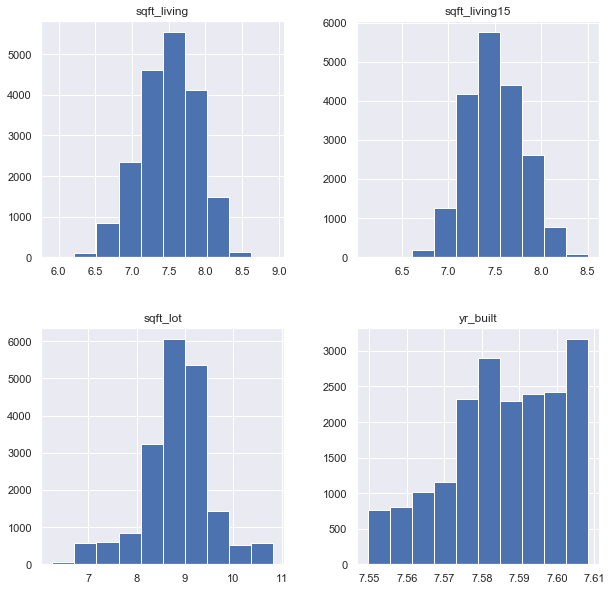

In [52]:
df_log.hist(figsize=(10,10));

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

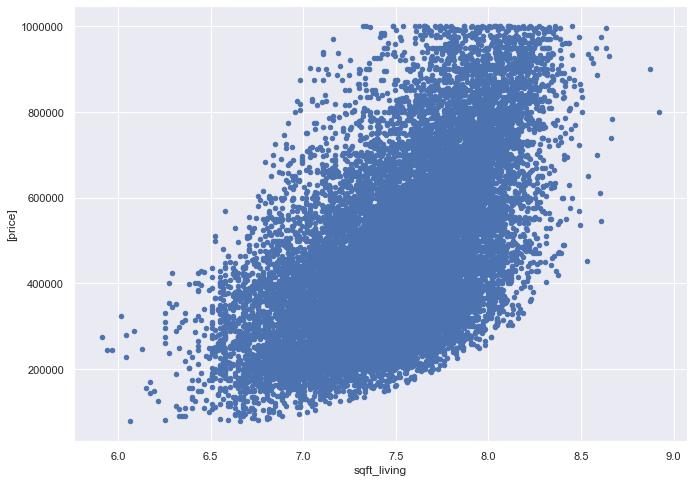

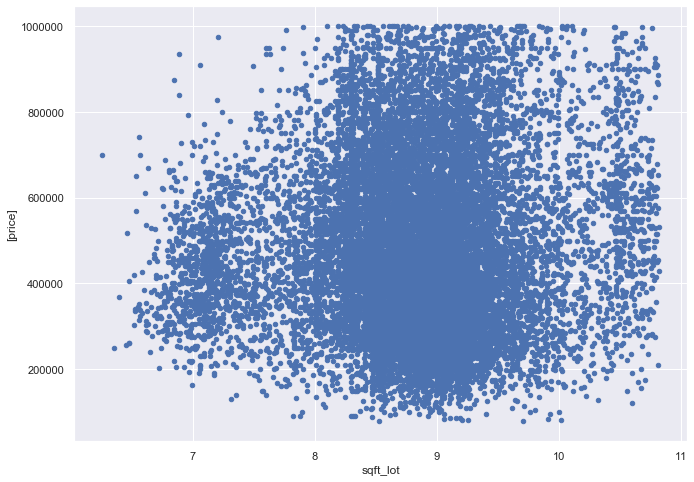

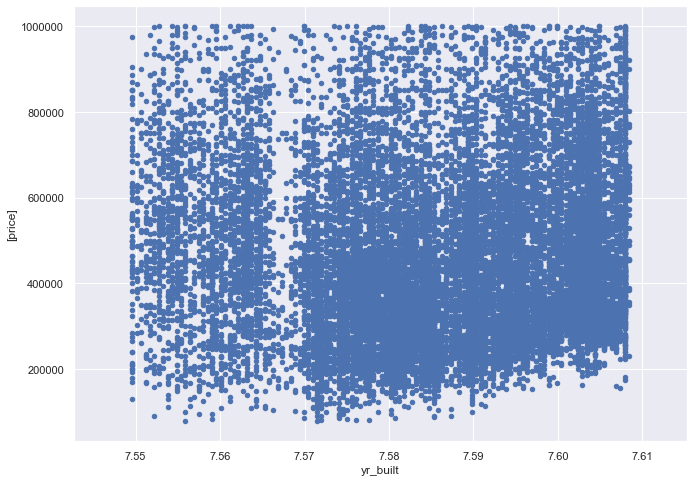

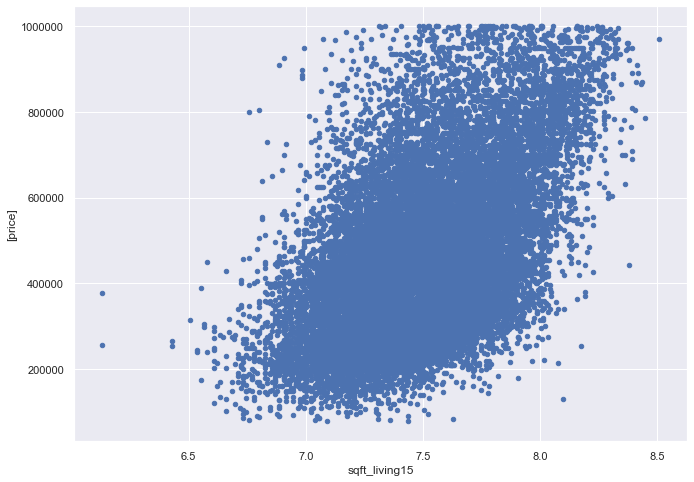

In [53]:
for col in non_normal:
    df.plot.scatter(x=col, y=['price'])    

## Apply Min-Max Scaling

In [54]:
non_normal = ['sqft_living', 'sqft_lot', 'sqft_basement', 'yr_built', 'sqft_living15', 'lat', 'long']

    
df_scaled = pd.DataFrame([])
for feat in non_normal:
    scaled = df[feat]
    df[feat] = (scaled-min(scaled))/(max(scaled)-min(scaled))
    df_scaled[feat] = df[feat]

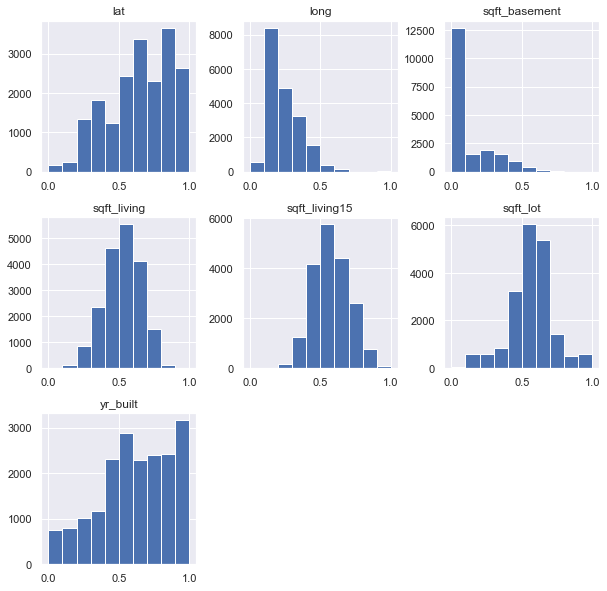

In [55]:
df_scaled.hist(figsize=(10,10));

In [56]:
df.head()

,price,sqft_living,sqft_lot,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,...,zp_98188,zp_98198,zp_98199,bath_1,bath_2,bath_3,bath_4,bath_5,bath_6,bath_7
0,221900.0,0.385755,0.522637,0.000000,0.485598,0,98178,0.571498,0.213033,0.450015,...,0,0,0,1,0,0,0,0,0,0
1,538000.0,0.644659,0.577022,0.166667,0.450745,1,98125,0.908959,0.161236,0.547686,...,0,0,0,0,1,0,0,0,0,0
2,180000.0,0.243769,0.647717,0.000000,0.293018,0,98028,0.936143,0.233083,0.747990,...,0,0,0,1,0,0,0,0,0,0
3,604000.0,0.554534,0.495862,0.379167,0.572419,0,98136,0.586939,0.099415,0.456251,...,0,0,0,0,0,1,0,0,0,0
4,510000.0,0.503261,0.601011,0.000000,0.761879,0,98074,0.741354,0.390142,0.574227,...,0,0,0,0,1,0,0,0,0,0


In [57]:
df.describe()

,price,sqft_living,sqft_lot,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,...,zp_98188,zp_98198,zp_98199,bath_1,bath_2,bath_3,bath_4,bath_5,bath_6,bath_7
count,19238.000000,19238.000000,19238.000000,19238.000000,19238.000000,19238.000000,19238.000000,19238.000000,19238.000000,19238.000000,...,19238.000000,19238.000000,19238.000000,19238.000000,19238.000000,19238.000000,19238.000000,19238.000000,19238.000000,19238.000000
mean,464102.919066,0.525259,0.566197,0.106908,0.617079,0.026042,98080.060921,0.647856,0.243642,0.574974,...,0.007069,0.014243,0.013099,0.416052,0.496985,0.076463,0.006394,0.000520,0.000104,0.000052
std,195658.304950,0.129212,0.152746,0.165354,0.254485,0.159265,53.739770,0.225193,0.114655,0.127738,...,0.083784,0.118493,0.113702,0.492915,0.500004,0.265745,0.079706,0.022794,0.010196,0.007210
min,78000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98001.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,310000.000000,0.437832,0.495862,0.000000,0.450745,0.000000,98033.000000,0.498472,0.149541,0.483221,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,429975.000000,0.529884,0.579310,0.000000,0.641558,0.000000,98072.000000,0.662699,0.219716,0.567153,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,588000.000000,0.619113,0.642732,0.208333,0.838782,0.000000,98118.000000,0.844298,0.314119,0.664388,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1000000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,98199.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
#df = df.drop(columns=['yr_built'], axis=1)

## Run Model

In [59]:
outcome = 'price'
predictors = df.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + '~' + pred_sum

In [60]:
model = ols(formula=formula, data=df).fit()

In [61]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     877.1
Date:                Mon, 09 Sep 2019   Prob (F-statistic):               0.00
Time:                        17:23:52   Log-Likelihood:            -2.4403e+05
No. Observations:               19238   AIC:                         4.883e+05
Df Residuals:                   19122   BIC:                         4.892e+05
Df Model:                         115                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -9766.4157    549.479    -17.774      0.000   -1.08e+04   -8689.388
sqft_living    5.469e+05   1.06e+04     51.400      0.000    5.26e+05    5.68e+05
sqft_lot       8.614e+04   6079.448     14.170      0.000    7.42e+04    9.81e+04
sqft_basement -7.108e+04   5048.441    -14.081      0.000    -8.1e+04   -6.12e+04
yr_built      -2.667e+04   4049.300     -6.586      0.000   -3.46e+04   -1.87e+04
yr_renovated   4.556e+04   3741.690     12.177      0.000    3.82e+04    5.29e+04
zipcode          -0.5360      0.826     -0.649      0.516      -2.155       1.083
lat            4.575e+04   2.15e+04      2.131      0.033    3661.602    8.78e+04
long          -1.304e+05   3.05e+04     -4.279      0.000    -1.9e+05   -7.07e+04
sqft_living15  1.388e+05   7654.414     18.137      0.000    1.24e+05    1.54e+05
flr_2          2254.8882   1737.468      1.298      0.194   -1150.702    5660.478
flr_3         -3.236e+04   4341.916     -7.452      0.000   -4.09e+04   -2.38e+04
flr_4         -3.859e+04   3.22e+04     -1.199      0.231   -1.02e+05    2.45e+04
bdrm_2        -6595.8817   6306.232     -1.046      0.296    -1.9e+04    5764.888
bdrm_3        -1.206e+04   6373.203     -1.892      0.058   -2.46e+04     431.040
bdrm_4        -1.029e+04   6562.139     -1.568      0.117   -2.32e+04    2571.314
bdrm_5        -1.536e+04   6961.399     -2.207      0.027    -2.9e+04   -1716.666
bdrm_6        -2.317e+04   8684.860     -2.668      0.008   -4.02e+04   -6150.032
bdrm_7        -5.735e+04   1.62e+04     -3.537      0.000   -8.91e+04   -2.56e+04
bdrm_8        -3.707e+04   2.73e+04     -1.360      0.174   -9.05e+04    1.63e+04
bdrm_9        -2.266e+04    4.6e+04     -0.492      0.622   -1.13e+05    6.76e+04
bdrm_10       -6.707e+04    5.6e+04     -1.198      0.231   -1.77e+05    4.27e+04
bdrm_11       -1.745e+04   7.89e+04     -0.221      0.825   -1.72e+05    1.37e+05
wtrft_1        1.612e+05   1.49e+04     10.819      0.000    1.32e+05     1.9e+05
view_1         5.492e+04   5009.474     10.963      0.000    4.51e+04    6.47e+04
view_2         5.591e+04   3146.456     17.768      0.000    4.97e+04    6.21e+04
view_3         7.631e+04   4900.393     15.572      0.000    6.67e+04    8.59e+04
view_4         1.531e+05   8456.692     18.103      0.000    1.37e+05     1.7e+05
cond_2         7.631e+04   1.71e+04      4.466      0.000    4.28e+04     1.1e+05
cond_3         1.064e+05   1.59e+04      6.698      0.000    7.53e+04    1.38e+05
cond_4         1.255e+05   1.59e+04      7.894      0.000    9.43e+04    1.57e+05
cond_5         1.579e+05    1.6e+04      9.877      0.000    1.27e+05    1.89e+05
grade_4       -1.392e+05   8.04e+04     -1.731      0.083   -2.97e+05    1.84e+04
grade_5       -1.726e+05   7.95e+04     -2.172      0.030   -3.28e+05   -1.68e+04
grade_6       -1.786e+05   7.94e+04     -2.249   

## Feature Scaling

### Stepwise Selection

In [62]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [63]:
result = stepwise_selection(predictors, df["price"], verbose = True)
print('resulting features:')
print(result)

C:\Users\Andy\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Add  grade_10                       with p-value 0.0
Add  grade_7                        with p-value 0.0
Add  grade_9                        with p-value 0.0
Add  grade_8                        with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  lat                            with p-value 0.0
Add  grade_11                       with p-value 0.0
Add  sqft_living15                  with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  zp_98004                       with p-value 6.15829e-178
Add  sqft_lot                       with p-value 5.03203e-159
Add  zp_98040                       with p-value 1.52269e-137
Add  zp_98155                       with p-value 1.74168e-114
Add  zp_98133                       with p-value 4.19254e-137
Add  zp_98028                       with p-value 1.57885e-113
Add  zp_98019                       with p-value 1.24585e-85
Add  zp_98011                       with p-value 4.15752e-92
Add  zp_98034                

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


Add  zp_98116                       with p-value 7.94178e-45
Add  view_3                         with p-value 9.17528e-39
Add  zp_98055                       with p-value 8.95828e-38
Add  zp_98136                       with p-value 1.97169e-35
Add  zp_98005                       with p-value 4.23306e-36
Add  zp_98109                       with p-value 9.73515e-36
Add  zp_98199                       with p-value 1.81054e-33
Add  sqft_basement                  with p-value 3.38162e-35
Add  zp_98102                       with p-value 9.29003e-34
Add  cond_4                         with p-value 2.01061e-31
Add  yr_renovated                   with p-value 2.77233e-34
Add  zp_98122                       with p-value 2.75383e-33
Add  zp_98105                       with p-value 1.37093e-35
Add  zp_98039                       with p-value 3.17222e-30
Add  zp_98027                       with p-value 1.70551e-29
Add  wtrft_1                        with p-value 2.40202e-26
Add  zp_98010           

In [64]:
outcome = 'price'
predictors = result
pred_sum = "+".join(predictors)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     1155.
Date:                Mon, 09 Sep 2019   Prob (F-statistic):               0.00
Time:                        17:28:35   Log-Likelihood:            -2.4407e+05
No. Observations:               19238   AIC:                         4.883e+05
Df Residuals:                   19150   BIC:                         4.890e+05
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.077e+08   4.24e+06    -25.394      0.000   -1.16e+08   -9.94e+07
grade_10        1.81e+05   4808.274     37.645      0.000    1.72e+05     1.9e+05
grade_7        1.203e+04   2206.383      5.451      0.000    7702.179    1.64e+04
grade_9         1.31e+05   3583.243     36.567      0.000    1.24e+05    1.38e+05
grade_8         5.27e+04   2779.572     18.959      0.000    4.73e+04    5.81e+04
yr_built      -2.764e+04   3955.939     -6.986      0.000   -3.54e+04   -1.99e+04
lat            1.132e+05   6794.775     16.656      0.000    9.99e+04    1.26e+05
grade_11       2.559e+05   9658.517     26.490      0.000    2.37e+05    2.75e+05
sqft_living15  1.445e+05   7572.260     19.086      0.000     1.3e+05    1.59e+05
sqft_living      5.4e+05   8777.543     61.520      0.000    5.23e+05    5.57e+05
zp_98004        4.34e+05   7652.953     56.707      0.000    4.19e+05    4.49e+05
zp_98040       3.144e+05   6860.852     45.830      0.000    3.01e+05    3.28e+05
zp_98155      -1.065e+05   4982.793    -21.381      0.000   -1.16e+05   -9.68e+04
zp_98133      -5.966e+04   4447.504    -13.415      0.000   -6.84e+04   -5.09e+04
zp_98011       5.622e+04   7283.939      7.719      0.000    4.19e+04    7.05e+04
zp_98034       7.825e+04   4887.189     16.012      0.000    6.87e+04    8.78e+04
view_4         1.531e+05   8452.736     18.112      0.000    1.37e+05     1.7e+05
zp_98177      -5.217e+04   6584.297     -7.923      0.000   -6.51e+04   -3.93e+04
zp_98006       2.183e+05   5099.960     42.799      0.000    2.08e+05    2.28e+05
zp_98168      -1.715e+05   6916.377    -24.793      0.000   -1.85e+05   -1.58e+05
zp_98178      -1.738e+05   7161.227    -24.271      0.000   -1.88e+05    -1.6e+05
view_2         5.515e+04   3140.966     17.559      0.000     4.9e+04    6.13e+04
zp_98112       2.381e+05   6893.677     34.536      0.000    2.25e+05    2.52e+05
cond_5         1.567e+05   1.59e+04      9.831      0.000    1.25e+05    1.88e+05
zp_98058      -5.442e+04   4119.647    -13.210      0.000   -6.25e+04   -4.63e+04
zp_98119       2.174e+05   7030.834     30.919      0.000    2.04e+05    2.31e+05
zp_98116       1.287e+05   5142.385     25.022      0.000    1.19e+05    1.39e+05
view_3         7.478e+04   4872.227     15.348      0.000    6.52e+04    8.43e+04
zp_98055      -4.546e+04   5064.998     -8.975      0.000   -5.54e+04   -3.55e+04
zp_98136       7.361e+04   5938.392     12.396      0.000     6.2e+04    8.53e+04
zp_98005       2.683e+05   7500.722     35.771      0.000    2.54e+05    2.83e+05
zp_98109       2.395e+05   9061.524     26.428      0.000    2.22e+05    2.57e+05
zp_98199       7.625e+04   7102.449     10.736      0.000    6.23e+04    9.02e+04
sqft_basement -7.441e+04   4299.152    -17.307      0.000   -8.28e+04    -6.6e+04
zp_98102       2.359e+05   9109.921     25.894   

# Model Validation


In [65]:
y = df[['price']]
val_df = df[result]
X = val_df

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [67]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

15390 3848 15390 3848


In [68]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

print(linreg.intercept_)

print(linreg.coef_)

zip(val_df.columns, linreg.coef_)

[-1.06960114e+08]
[[ 186433.25878875   12457.04592855  133092.42713015   53408.66151768
   -29738.52979564  112246.88015477  254289.59403713  141571.94796046
   543732.38930972  440818.18747584  313947.417372   -109896.38248614
   -60517.13692221   54336.96661279   79623.28645294  143767.82356646
   -51878.49450554  215413.78816852 -172037.8176753  -176121.78971282
    50354.03187544  233958.56964971  148633.6296966   -55968.16248124
   221557.43367899  129502.10180339   75379.21090436  -44380.23562563
    73647.10881036  268604.45554847  230953.22524335   76100.30646624
   -71125.6080973   233186.15163304  115320.98567867   45861.21104471
   130536.93702843  198157.81246019  531491.45278445  138713.05192176
   174354.12256      71210.39399096   48863.34424423   22217.10820739
   -25323.34552868  -41451.36730973  130783.66960944 -196269.98770852
   152285.25760013  -85310.92923948   78362.59137681   95182.32479456
  -205962.1069283    95997.80513941  124582.74979148  -48517.63701727
  

In [69]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [70]:
train_residuals = y_hat_train - y_train
print(train_residuals)
test_residuals = y_hat_test - y_test
print(test_residuals)

               price
429     -4957.558839
3697   -18906.096439
4822   -31843.002471
12052   34875.249751
11361 -133306.701237
21177   97296.416886
6682   -65825.728580
4152     2835.952130
9143    13440.636020
15270 -133493.978139
20767   56188.782055
12684   84980.864165
7439   115444.691120
1574    22108.560847
7283   -43716.195281
19608 -182694.187780
3769   -55478.430017
15759  116712.212617
5430    71365.590825
3701    16244.079005
19328  124634.470025
12281  -41070.786108
1148   -47757.998798
15948   52358.876181
1063   111216.863668
12710  -45853.144097
7742   -13235.338366
17086  -64173.932904
20769   59986.508337
220     70768.765991
...              ...
6597  -128570.023112
15009   47507.662109
11799   56500.517082
15787  153353.930694
3370    53018.637482
12857  -52059.330735
13089    -369.796723
53     -26106.814353
18477  -60674.260362
6314    17471.772939
2204    23028.364282
11951  -13304.448547
8500   -60460.649059
16672  -76071.607483
17136   40546.109639
16480  -33729

In [71]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 6087975864.380427
Test Mean Squarred Error: 6318274099.733689
